In [192]:
import math
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("poster")
sns.set_style("ticks")
import urllib2, requests
from bs4 import BeautifulSoup
import matplotlib.pyplot
from sklearn import linear_model
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

In [11]:
def extract_text(el):
    if el:
        return el.text.strip()
    else:
        return ''      

def get_price_from_result(result):
    return extract_text(result.find('div', {'class' : 'price'}))

def get__vechile_from_result(result):
    return extract_text(result.find('div', {'class' : 'vehicle-features'}))

def get_make_from_result(result):
    return extract_text(result.find('div', {'class' : 'n_width-max title '}))

def get_location_from_result(result):
    return extract_text(result.find('span', {'class' : 'state'}))

def get_summary_from_result(result):
    return extract_text(result.find('div', {'class' : 'comments'}))

    return None


http://www.carsales.com.au/cars/results?offset=12&setype=pagination&q=%28And.%28C.Make.Toyota._.Model.Corolla.%29_.Service.Carsales.%29&area=Stock&vertical=car&WT.z_srchsrcx=makemodel

In [14]:
url_template = "http://www.carsales.com.au/cars/results?offset={}&setype=pagination&q=%28And.Service.Carsales._.%28C.Make.Toyota._.Model.Corolla.%29_.FuelEconomy.{}.%29&WT.z_srchsrcx=makemodell"
max_results_per_state = 1 # Set this to a high-value (5000) to generate more results. 

# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

#city = elem.find('span', attrs={'itemprop':'addressLocality'}).getText()

rows = []
bigger_rows = []
for state in range(12,4056,12):#, '5L/100km or less', '7L/100km or less', '9L/100km or less', '11L/100km or less', '11L/100km or more']):
    for start in set([ '11L%2F100km%20or%20less']): 
        r = requests.get(url_template.format(state, start))
        print url_template.format(state, start)
        soup = BeautifulSoup(r.content) 
        results = soup.findAll('div', { "class" : "listing-item n_margin-20 premium " })
        for result in results:
            if result:
                row = {}
                row['make'] = get_make_from_result(result)
                row['price'] = get_price_from_result(result)
                row['vechile features'] =get__vechile_from_result(result)
                row['location'] = get_location_from_result(result)
                row['fuel_efficiency'] = start
                rows.append(row)
print url_template

http://www.carsales.com.au/cars/results?offset=12&setype=pagination&q=%28And.Service.Carsales._.%28C.Make.Toyota._.Model.Corolla.%29_.FuelEconomy.11L%2F100km%20or%20less.%29&WT.z_srchsrcx=makemodell
http://www.carsales.com.au/cars/results?offset=24&setype=pagination&q=%28And.Service.Carsales._.%28C.Make.Toyota._.Model.Corolla.%29_.FuelEconomy.11L%2F100km%20or%20less.%29&WT.z_srchsrcx=makemodell
http://www.carsales.com.au/cars/results?offset=36&setype=pagination&q=%28And.Service.Carsales._.%28C.Make.Toyota._.Model.Corolla.%29_.FuelEconomy.11L%2F100km%20or%20less.%29&WT.z_srchsrcx=makemodell
http://www.carsales.com.au/cars/results?offset=48&setype=pagination&q=%28And.Service.Carsales._.%28C.Make.Toyota._.Model.Corolla.%29_.FuelEconomy.11L%2F100km%20or%20less.%29&WT.z_srchsrcx=makemodell
http://www.carsales.com.au/cars/results?offset=60&setype=pagination&q=%28And.Service.Carsales._.%28C.Make.Toyota._.Model.Corolla.%29_.FuelEconomy.11L%2F100km%20or%20less.%29&WT.z_srchsrcx=makemodell
http:

In [15]:
corolla = pd.DataFrame.from_records(rows)
corolla.to_csv('corolla_premium.csv', encoding='utf-8', index=False)
#cat_4['vechile features'].value_counts()
corolla

,fuel_efficiency,location,make,price,vechile features
0,11L%2F100km%20or%20less,WA,2008 Toyota Corolla Ascent Manual,"$10,980*","Odometer\n46,967 km\n\n\nBody\nHatch\n\n\nTran..."
1,11L%2F100km%20or%20less,NSW,2015 Toyota Corolla Ascent Sport Auto,"$22,500*","Odometer\n11,757 km\n\n\nBody\nHatch\n\n\nTran..."
2,11L%2F100km%20or%20less,QLD,2015 Toyota Corolla Ascent Auto,"$18,888","Odometer\n17,660 km\n\n\nBody\nHatch\n\n\nTran..."
3,11L%2F100km%20or%20less,VIC,2014 Toyota Corolla Ascent Sport Auto,"$17,990","Odometer\n64,790 km\n\n\nBody\nHatch\n\n\nTran..."
4,11L%2F100km%20or%20less,NSW,2008 Toyota Corolla Ascent Auto,"$11,888*","Odometer\n93,653 km\n\n\nBody\nSedan\n\n\nTran..."
5,11L%2F100km%20or%20less,VIC,2015 Toyota Corolla Ascent Sport Auto,"$21,888","Odometer\n32,158 km\n\n\nBody\nHatch\n\n\nTran..."
6,11L%2F100km%20or%20less,VIC,2015 Toyota Corolla Ascent Auto,"$19,990","Odometer\n31,653 km\n\n\nBody\nHatch\n\n\nTran..."
7,11L%2F100km%20or%20less,NSW,2015 Toyota Corolla Ascent Auto,"$18,990*","Odometer\n24,812 km\n\n\nBody\nHatch\n\n\nTran..."
8,11L%2F100km%20or%20less,VIC,2014 Toyota Corolla Ascent Auto,"$16,990","Odometer\n47,283 km\n\n\nBody\nHatch\n\n\nTran..."
9,11L%2F100km%20or%20less,QLD,2013 Toyota Corolla Ascent Sport Auto,"$16,488","Odometer\n64,973 km\n\n\nBody\nHatch\n\n\nTran..."


In [105]:
premium = pd.read_csv('corolla_premium.csv' )
standard = pd.read_csv('corolla_standard.csv')
special = pd.read_csv('corolla_special.csv' )
premium['fuel_efficiency'].replace("11L%2F100km%20or%20less", "11L/100km or less", inplace=True)
standard['fuel_efficiency'].replace("11L%2F100km%20or%20less", "11L/100km or less", inplace=True)
special['fuel_efficiency'].replace("11L%2F100km%20or%20less", "11L/100km or less", inplace=True)
special

,fuel_efficiency,location,make,price,vechile features
0,11L/100km or less,NaN,2016 Toyota Corolla Ascent Sport Auto,"$24,440",Body\r\nHatch\r\n\r\n\r\nTransmission\r\nAutom...
1,11L/100km or less,NaN,2016 Toyota Corolla Ascent Sport Auto,"$24,440",Body\r\nHatch\r\n\r\n\r\nTransmission\r\nAutom...
2,11L/100km or less,NaN,2016 Toyota Corolla Ascent Auto,"$24,440",Body\r\nSedan\r\n\r\n\r\nTransmission\r\nAutom...
3,11L/100km or less,NaN,2016 Toyota Corolla Ascent Sport Auto,"$24,440",Body\r\nHatch\r\n\r\n\r\nTransmission\r\nAutom...
4,11L/100km or less,NaN,2016 Toyota Corolla Ascent Sport Manual,"$22,440",Body\r\nHatch\r\n\r\n\r\nTransmission\r\nManua...
5,11L/100km or less,NaN,2016 Toyota Corolla Ascent Sport Auto,"$24,440",Body\r\nHatch\r\n\r\n\r\nTransmission\r\nAutom...
6,11L/100km or less,NaN,2016 Toyota Corolla Ascent Manual,"$22,440",Body\r\nSedan\r\n\r\n\r\nTransmission\r\nManua...
7,11L/100km or less,NaN,2016 Toyota Corolla Ascent Sport Auto,"$24,440",Body\r\nHatch\r\n\r\n\r\nTransmission\r\nAutom...
8,11L/100km or less,NaN,2016 Toyota Corolla Ascent Auto,"$24,440",Body\r\nSedan\r\n\r\n\r\nTransmission\r\nAutom...
9,11L/100km or less,NaN,2016 Toyota Corolla Ascent Sport Manual,"$22,440",Body\r\nHatch\r\n\r\n\r\nTransmission\r\nManua...


In [144]:
frames = [standard]
result = pd.concat(frames, ignore_index=True)
result

,fuel_efficiency,location,make,price,vechile features
0,11L/100km or less,VIC,2014 Toyota Corolla Levin ZR Auto,"$20,850","Odometer\r\n46,519 km\r\n\r\n\r\nBody\r\nHatch..."
1,11L/100km or less,WA,2006 Toyota Corolla Conquest Auto,"$7,989*","Odometer\r\n96,500 km\r\n\r\n\r\nBody\r\nHatch..."
2,11L/100km or less,NSW,2015 Toyota Corolla Ascent Sport Manual,"$19,990*","Odometer\r\n10,318 km\r\n\r\n\r\nBody\r\nHatch..."
3,11L/100km or less,WA,2014 Toyota Corolla Ascent Auto,"$13,990*","Odometer\r\n71,408 km\r\n\r\n\r\nBody\r\nSedan..."
4,11L/100km or less,SA,2007 Toyota Corolla Conquest Auto,"$11,998*","Odometer\r\n29,115 km\r\n\r\n\r\nBody\r\nSedan..."
5,11L/100km or less,NSW,2007 Toyota Corolla Ascent Auto,"$11,990*","Odometer\r\n125,209 km\r\n\r\n\r\nBody\r\nSeda..."
6,11L/100km or less,WA,2007 Toyota Corolla Ascent Auto,"$8,990*","Odometer\r\n126,880 km\r\n\r\n\r\nBody\r\nSeda..."
7,11L/100km or less,NSW,2013 Toyota Corolla Ascent Auto,"$15,888*","Odometer\r\n59,162 km\r\n\r\n\r\nBody\r\nSedan..."
8,11L/100km or less,VIC,2007 Toyota Corolla Ascent Auto,"$12,850","Odometer\r\n25,982 km\r\n\r\n\r\nBody\r\nHatch..."
9,11L/100km or less,VIC,2015 Toyota Corolla SX Auto,"$26,888","Odometer\r\n9,476 km\r\n\r\n\r\nBody\r\nHatch\..."


In [145]:
result['price'].replace('', np.nan, inplace=True)
result['location'].replace('', np.nan, inplace=True)
result['make'].replace('', np.nan, inplace=True)
result['vechile features'].replace('', np.nan, inplace=True)
result.reset_index(drop = True, inplace=True)
result.replace('11L/100km or less','11',inplace=True)
#result.location.fillna("NEW")
result["location"].fillna("NEW", inplace=True)
result

,fuel_efficiency,location,make,price,vechile features
0,11,VIC,2014 Toyota Corolla Levin ZR Auto,"$20,850","Odometer\r\n46,519 km\r\n\r\n\r\nBody\r\nHatch..."
1,11,WA,2006 Toyota Corolla Conquest Auto,"$7,989*","Odometer\r\n96,500 km\r\n\r\n\r\nBody\r\nHatch..."
2,11,NSW,2015 Toyota Corolla Ascent Sport Manual,"$19,990*","Odometer\r\n10,318 km\r\n\r\n\r\nBody\r\nHatch..."
3,11,WA,2014 Toyota Corolla Ascent Auto,"$13,990*","Odometer\r\n71,408 km\r\n\r\n\r\nBody\r\nSedan..."
4,11,SA,2007 Toyota Corolla Conquest Auto,"$11,998*","Odometer\r\n29,115 km\r\n\r\n\r\nBody\r\nSedan..."
5,11,NSW,2007 Toyota Corolla Ascent Auto,"$11,990*","Odometer\r\n125,209 km\r\n\r\n\r\nBody\r\nSeda..."
6,11,WA,2007 Toyota Corolla Ascent Auto,"$8,990*","Odometer\r\n126,880 km\r\n\r\n\r\nBody\r\nSeda..."
7,11,NSW,2013 Toyota Corolla Ascent Auto,"$15,888*","Odometer\r\n59,162 km\r\n\r\n\r\nBody\r\nSedan..."
8,11,VIC,2007 Toyota Corolla Ascent Auto,"$12,850","Odometer\r\n25,982 km\r\n\r\n\r\nBody\r\nHatch..."
9,11,VIC,2015 Toyota Corolla SX Auto,"$26,888","Odometer\r\n9,476 km\r\n\r\n\r\nBody\r\nHatch\..."


In [146]:
result.location.unique()

array(['VIC', 'WA', 'NSW', 'SA', 'QLD', 'ACT', 'TAS', 'NT', 'NEW'], dtype=object)

In [147]:
result.dropna(how='any',axis=0, inplace=True)

In [148]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3397 entries, 0 to 3396
Data columns (total 5 columns):
fuel_efficiency     3397 non-null object
location            3397 non-null object
make                3397 non-null object
price               3397 non-null object
vechile features    3397 non-null object
dtypes: object(5)
memory usage: 159.2+ KB


In [149]:
result['price'] = result['price'].map(lambda x: x.lstrip('$').rstrip('*'))

In [150]:
year = pd.DataFrame(result.make.str.split(' ',1).tolist(),
                  columns = ['year','car make'])

make = pd.DataFrame(year['car make'].str.split(' ',1).tolist(),
                  columns = ['car make','type'])

model = pd.DataFrame(make['type'].str.split(' ',1).tolist(),
                    columns = ['model', 'type'])
model

,model,type
0,Corolla,Levin ZR Auto
1,Corolla,Conquest Auto
2,Corolla,Ascent Sport Manual
3,Corolla,Ascent Auto
4,Corolla,Conquest Auto
5,Corolla,Ascent Auto
6,Corolla,Ascent Auto
7,Corolla,Ascent Auto
8,Corolla,Ascent Auto
9,Corolla,SX Auto


In [151]:
odometer = pd.DataFrame(result['vechile features'].str.split(' ',1).tolist(),
                  columns = ['odometer','features'])

odometer.odometer = odometer.odometer.map(lambda x: x.lstrip('Odometer\r\n'))
odometer['features'] = odometer['features'].map(lambda x: x.lstrip('km\r\n\r\n\r\nBody\r\n'))
odometer

,odometer,features
0,"46,519",Hatch\r\n\r\n\r\nTransmission\r\nAutomatic\r\n...
1,"96,500",Hatch\r\n\r\n\r\nTransmission\r\nAutomatic\r\n...
2,"10,318",Hatch\r\n\r\n\r\nTransmission\r\nManual\r\n\r\...
3,"71,408",Sedan\r\n\r\n\r\nTransmission\r\nAutomatic\r\n...
4,"29,115",Sedan\r\n\r\n\r\nTransmission\r\nAutomatic\r\n...
5,"125,209",Sedan\r\n\r\n\r\nTransmission\r\nAutomatic\r\n...
6,"126,880",Sedan\r\n\r\n\r\nTransmission\r\nAutomatic\r\n...
7,"59,162",Sedan\r\n\r\n\r\nTransmission\r\nAutomatic\r\n...
8,"25,982",Hatch\r\n\r\n\r\nTransmission\r\nAutomatic\r\n...
9,"9,476",Hatch\r\n\r\n\r\nTransmission\r\nAutomatic\r\n...


In [152]:
body = pd.DataFrame(odometer.features.str.split('\r\n\r\n\r\n',1).tolist(),
                  columns = ['body','type'])
body['type'] = body['type'].map(lambda x: x.lstrip('Transmission\r\n'))
body

,body,type
0,Hatch,Automatic\r\n\r\n\r\nEngine\r\n4cyl 1.8L Petrol
1,Hatch,Automatic\r\n\r\n\r\nEngine\r\n4cyl 1.8L Petrol
2,Hatch,Manual\r\n\r\n\r\nEngine\r\n4cyl 1.8L Petrol
3,Sedan,Automatic\r\n\r\n\r\nEngine\r\n4cyl 1.8L Petrol
4,Sedan,Automatic\r\n\r\n\r\nEngine\r\n4cyl 1.8L Petrol
5,Sedan,Automatic\r\n\r\n\r\nEngine\r\n4cyl 1.8L Petrol
6,Sedan,Automatic\r\n\r\n\r\nEngine\r\n4cyl 1.8L Petrol
7,Sedan,Automatic\r\n\r\n\r\nEngine\r\n4cyl 1.8L Petrol
8,Hatch,Automatic\r\n\r\n\r\nEngine\r\n4cyl 1.8L Petrol
9,Hatch,Automatic\r\n\r\n\r\nEngine\r\n4cyl 1.8L Petrol


In [153]:
transmission = pd.DataFrame(body['type'].str.split('\r\n\r\n\r\n',1).tolist(),
                  columns = ['transmission','data'])
transmission.fillna("Engine\r\n4cyl 1.8L Petrol", inplace=True)
transmission.data = transmission.data.map(lambda x: x.lstrip('Engine\r\n'))
transmission

,transmission,data
0,Automatic,4cyl 1.8L Petrol
1,Automatic,4cyl 1.8L Petrol
2,Manual,4cyl 1.8L Petrol
3,Automatic,4cyl 1.8L Petrol
4,Automatic,4cyl 1.8L Petrol
5,Automatic,4cyl 1.8L Petrol
6,Automatic,4cyl 1.8L Petrol
7,Automatic,4cyl 1.8L Petrol
8,Automatic,4cyl 1.8L Petrol
9,Automatic,4cyl 1.8L Petrol


In [154]:
engine = pd.DataFrame(transmission.data.str.split(' ',1).tolist(),
                  columns = ['Number of cylinders','capacity'])
engine['Number of cylinders'] = engine['Number of cylinders'].map(lambda x: x.rstrip('cyl'))

In [155]:
capacity = pd.DataFrame(engine.capacity.str.split(' ',1).tolist(),
                  columns = ['capacity','fuel type'])
capacity['capacity'] = capacity['capacity'].map(lambda x: x.rstrip('L'))

In [156]:
corolla_data = pd.concat([result, make['car make'], make['type'], model['model'], year.year, odometer.odometer, body.body, transmission.transmission, engine['Number of cylinders'],capacity.capacity, capacity['fuel type'] ], axis=1)

In [157]:
corolla_data.odometer.value_counts()

Body\r\nHatch\r\n\r\n\r\nTransmission\r\nAutomatic\r\n\r\n\r\nEngine\r\n4cyl    28
Body\r\nSedan\r\n\r\n\r\nTransmission\r\nAutomatic\r\n\r\n\r\nEngine\r\n4cyl    24
Body\r\nSedan\r\n\r\n\r\nTransmission\r\nManual\r\n\r\n\r\nEngine\r\n4cyl       19
160,000                                                                         11
60,000                                                                          11
125,000                                                                         11
94,000                                                                          10
150,000                                                                         10
130,000                                                                          9
100,000                                                                          9
65,000                                                                           9
70,000                                                                           9
36,0

In [158]:
corolla_data['odometer'].replace('Body\r\nHatch\r\n\r\n\r\nTransmission\r\nAutomatic\r\n\r\n\r\nEngine\r\n4cyl','1',inplace=True)


In [175]:
corolla_data['odometer'].replace('Body\r\nSedan\r\n\r\n\r\nTransmission\r\nAutomatic\r\n\r\n\r\nEngine\r\n4cyl','1',inplace=True)
corolla_data['odometer'].replace('Body\r\nSedan\r\n\r\n\r\nTransmission\r\nManual\r\n\r\n\r\nEngine\r\n4cyl','1',inplace=True)
corolla_data['odometer'].replace('Body\r\nHatch\r\n\r\n\r\nTransmission\r\nManual\r\n\r\n\r\nEngine\r\n4cyl','1',inplace=True)
corolla_data['price'].replace('155,000','15,500',inplace=True)
corolla_data['odometer'].replace('17,103', '171,103', inplace = True)

In [176]:
corolla_data.to_csv('corolla.csv', encoding='utf-8', index=False)

In [177]:
cor = pd.read_csv('corolla.csv', thousands = ',')
cor

,fuel_efficiency,location,make,price,vechile features,car make,type,model,year,odometer,body,transmission,Number of cylinders,capacity,fuel type
0,11,VIC,2014 Toyota Corolla Levin ZR Auto,20850,"Odometer\r\r\n46,519 km\r\r\n\r\r\n\r\r\nBody\...",Toyota,Corolla Levin ZR Auto,Corolla,2014,46519,Hatch,Automatic,4,1.8,Petrol
1,11,WA,2006 Toyota Corolla Conquest Auto,7989,"Odometer\r\r\n96,500 km\r\r\n\r\r\n\r\r\nBody\...",Toyota,Corolla Conquest Auto,Corolla,2006,96500,Hatch,Automatic,4,1.8,Petrol
2,11,NSW,2015 Toyota Corolla Ascent Sport Manual,19990,"Odometer\r\r\n10,318 km\r\r\n\r\r\n\r\r\nBody\...",Toyota,Corolla Ascent Sport Manual,Corolla,2015,10318,Hatch,Manual,4,1.8,Petrol
3,11,WA,2014 Toyota Corolla Ascent Auto,13990,"Odometer\r\r\n71,408 km\r\r\n\r\r\n\r\r\nBody\...",Toyota,Corolla Ascent Auto,Corolla,2014,71408,Sedan,Automatic,4,1.8,Petrol
4,11,SA,2007 Toyota Corolla Conquest Auto,11998,"Odometer\r\r\n29,115 km\r\r\n\r\r\n\r\r\nBody\...",Toyota,Corolla Conquest Auto,Corolla,2007,29115,Sedan,Automatic,4,1.8,Petrol
5,11,NSW,2007 Toyota Corolla Ascent Auto,11990,"Odometer\r\r\n125,209 km\r\r\n\r\r\n\r\r\nBody...",Toyota,Corolla Ascent Auto,Corolla,2007,125209,Sedan,Automatic,4,1.8,Petrol
6,11,WA,2007 Toyota Corolla Ascent Auto,8990,"Odometer\r\r\n126,880 km\r\r\n\r\r\n\r\r\nBody...",Toyota,Corolla Ascent Auto,Corolla,2007,126880,Sedan,Automatic,4,1.8,Petrol
7,11,NSW,2013 Toyota Corolla Ascent Auto,15888,"Odometer\r\r\n59,162 km\r\r\n\r\r\n\r\r\nBody\...",Toyota,Corolla Ascent Auto,Corolla,2013,59162,Sedan,Automatic,4,1.8,Petrol
8,11,VIC,2007 Toyota Corolla Ascent Auto,12850,"Odometer\r\r\n25,982 km\r\r\n\r\r\n\r\r\nBody\...",Toyota,Corolla Ascent Auto,Corolla,2007,25982,Hatch,Automatic,4,1.8,Petrol
9,11,VIC,2015 Toyota Corolla SX Auto,26888,"Odometer\r\r\n9,476 km\r\r\n\r\r\n\r\r\nBody\r...",Toyota,Corolla SX Auto,Corolla,2015,9476,Hatch,Automatic,4,1.8,Petrol


In [178]:
cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 15 columns):
fuel_efficiency        3397 non-null int64
location               3397 non-null object
make                   3397 non-null object
price                  3397 non-null int64
vechile features       3397 non-null object
car make               3397 non-null object
type                   3397 non-null object
model                  3397 non-null object
year                   3397 non-null int64
odometer               3397 non-null int64
body                   3397 non-null object
transmission           3397 non-null object
Number of cylinders    3397 non-null int64
capacity               3397 non-null float64
fuel type              3397 non-null object
dtypes: float64(1), int64(5), object(9)
memory usage: 398.2+ KB


In [179]:
cor.describe()

,fuel_efficiency,price,year,odometer,Number of cylinders,capacity
count,3397.0,3397.000000,3397.000000,3397.000000,3397.0,3397.000000
mean,11.0,12712.374154,2009.443921,93639.964086,4.0,1.793318
std,0.0,6325.436554,5.203926,69126.368582,0.0,0.037195
min,11.0,400.000000,1984.000000,1.000000,4.0,1.300000
25%,11.0,7990.000000,2007.000000,41500.000000,4.0,1.800000
50%,11.0,12888.000000,2011.000000,76801.000000,4.0,1.800000
75%,11.0,16990.000000,2014.000000,133600.000000,4.0,1.800000
max,11.0,35449.000000,2016.000000,785500.000000,4.0,2.000000


In [181]:
cor[cor.odometer == 171103]

,fuel_efficiency,location,make,price,vechile features,car make,type,model,year,odometer,body,transmission,Number of cylinders,capacity,fuel type
1302,11,NSW,2004 Toyota Corolla Ascent Manual,4990,"Odometer\r\r\n171,103 km\r\r\n\r\r\n\r\r\nBody...",Toyota,Corolla Ascent Manual,Corolla,2004,171103,Wagon,Manual,4,1.8,Petrol
3075,11,ACT,1997 Toyota Corolla CSi Seca Manual,1000,"Odometer\r\r\n17,103 km\r\r\n\r\r\n\r\r\nBody\...",Toyota,Corolla CSi Seca Manual,Corolla,1997,171103,Hatch,Manual,4,1.6,Petrol


In [182]:
cor['age'] = 2016 - cor['year']
cor['utilization_ratio'] = (cor.odometer)/(cor.age)

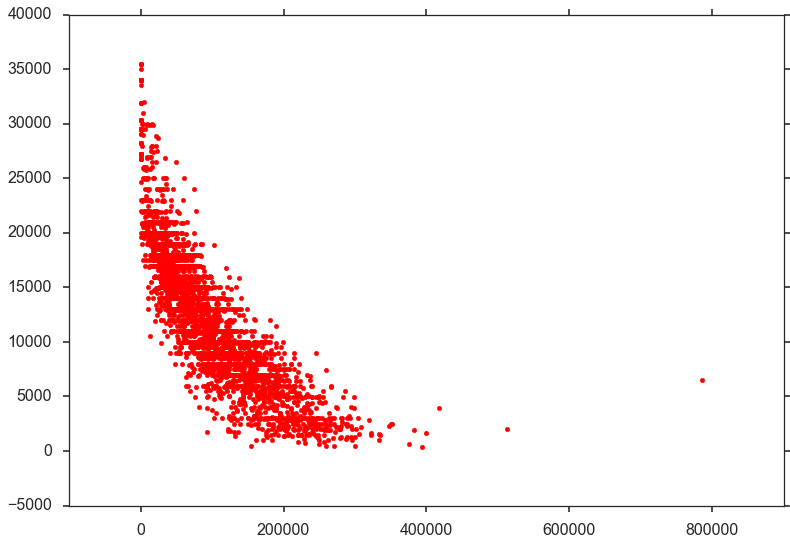

In [183]:
matplotlib.pyplot.scatter(cor.odometer, cor.price, color = 'red')

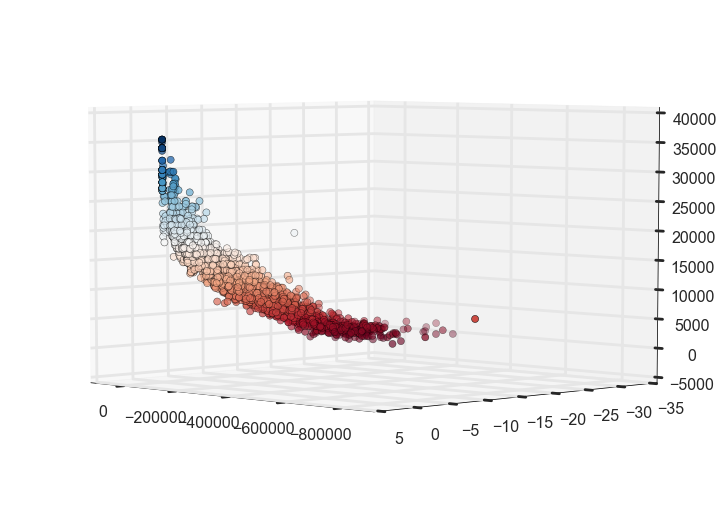

In [218]:
import mpl_toolkits.mplot3d
import numpy
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
def normalised_bath_colour(x):
    return x / 3.0

ax.scatter(-cor.odometer, -cor.age, cor.price,
           s=50,
           cmap=matplotlib.pyplot.cm.RdBu,
           c=cor.price.map(normalised_bath_colour))
ax.view_init(5, 135)

In [193]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

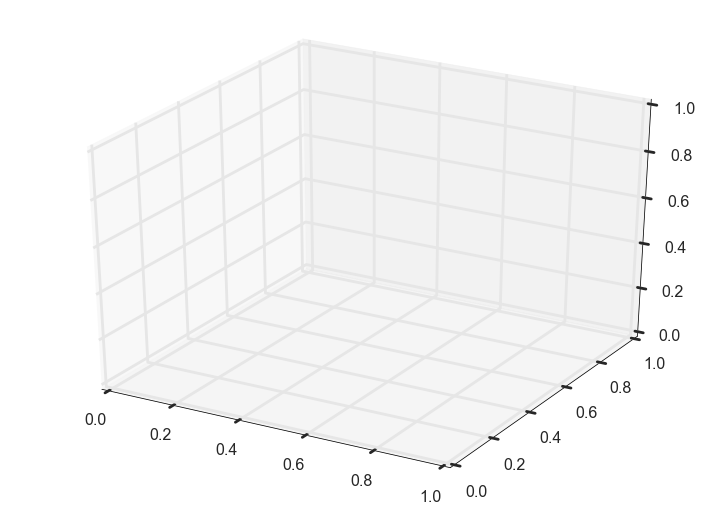

In [194]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = cor.odometer.values
Y = cor.price.values
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
Z = cor.age.values

surf = ax.plot_surface(X, Y, Z)
plt.show()

ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()